In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_auc_score

In [2]:
X = pd.read_csv("train.csv")

In [3]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
Y = X.pop("Survived")

In [4]:
X.Age.fillna(X.Age.mean(),inplace=True)

In [13]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
numeric_variables = list(X.dtypes[X.dtypes!="object"].index)

In [22]:
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [23]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
X[list(X.dtypes[X.dtypes=="object"].index)].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carter, Mr. William Ernest",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [5]:
X.drop(["Name", "Ticket", "PassengerId"],axis=1, inplace=True)

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "none"

X["Cabin"] = X.Cabin.apply(clean_cabin)

In [7]:
dummies = pd.get_dummies(X["Sex"],prefix="Sex")

In [8]:
X = pd.concat([X, dummies], axis=1)
X.drop("Sex",axis=1,inplace=True)

In [9]:
X["Cabin"].fillna("Missing",inplace=True)
dummies = pd.get_dummies(X["Cabin"],prefix="Cabin")
X = pd.concat([X, dummies], axis=1)
X.drop("Cabin", axis=1, inplace=True)

In [10]:
X["Embarked"].fillna("Missing",inplace=True)
dummies = pd.get_dummies(X["Embarked"],prefix="Embarked")
X = pd.concat([X, dummies], axis=1)
X.drop("Embarked", axis=1, inplace=True)

In [12]:
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,Y)
roc_auc_score(Y,model.oob_prediction_)

0.86386998157202344

C:\Users\dqlsll123\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


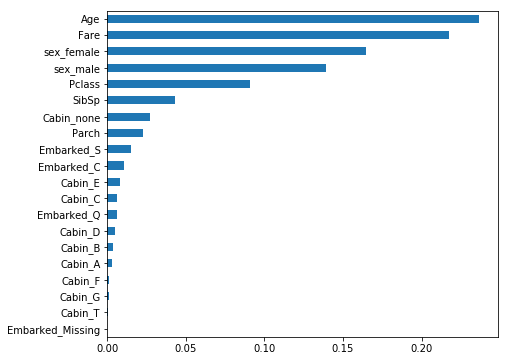

In [16]:
import matplotlib.pyplot as plt
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));
plt.show()

In [35]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,Y)


1 loop, best of 3: 1.16 s per loop


In [36]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X,Y)

1 loop, best of 3: 1.83 s per loop


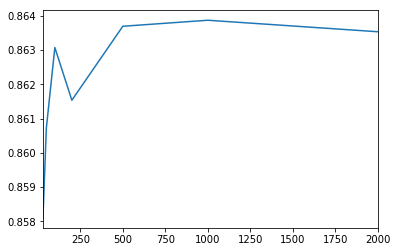

In [19]:
result = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X,Y)
    roc = roc_auc_score(Y, model.oob_prediction_)
    result.append(roc)

pd.Series(result, n_estimator_options).plot()
plt.show()
    

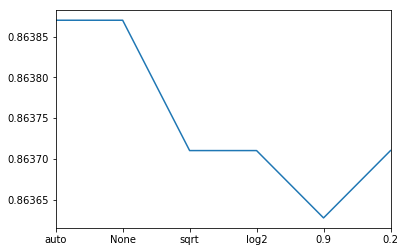

In [22]:
result = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X,Y)
    roc = roc_auc_score(Y, model.oob_prediction_)
    result.append(roc)

pd.Series(result, max_features_options).plot()
plt.show()

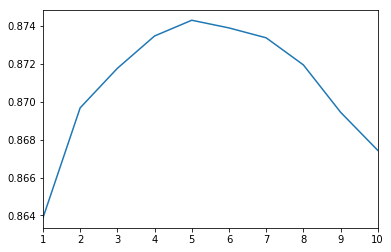

In [23]:
result = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    model.fit(X,Y)
    roc = roc_auc_score(Y, model.oob_prediction_)
    result.append(roc)

pd.Series(result, min_samples_leaf_options).plot()
plt.show()

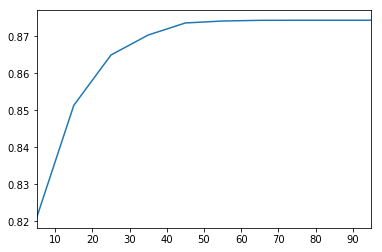

In [26]:
result = []
max_leaf_nodes_options = [5, 15, 25, 35, 45, 55, 65, 75, 85, 85, 95]

for max_leaf_nodes in max_leaf_nodes_options:
    model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, 
                                  random_state=42, max_features="auto", min_samples_leaf=5, max_leaf_nodes=max_leaf_nodes)
    model.fit(X,Y)
    roc = roc_auc_score(Y, model.oob_prediction_)
    result.append(roc)

pd.Series(result, max_leaf_nodes_options).plot()
plt.show()

In [11]:
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, 
                                  random_state=42, max_features="auto", min_samples_leaf=5)
model.fit(X,Y)
print(roc_auc_score(Y, model.oob_prediction_))

0.874300961876


In [12]:
X_test = pd.read_csv("test.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
X_test.drop(["Name","PassengerId","Ticket"], axis=1, inplace=True)

In [39]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [14]:
X_test["Cabin"] = X_test["Cabin"].apply(clean_cabin)

In [15]:
index_set = ["Cabin", "Sex", "Embarked"]
for index in index_set:
    X_test[index].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X_test[index], prefix=index)
    X_test = pd.concat([X_test,dummies], axis=1)
    X_test.drop(index, axis=1, inplace=True)

In [42]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_none,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,0,0,0,0,0,0,1,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,0,0,0,0,1,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,0,0,0,0,0,1,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,0,0,0,0,0,1,0,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,0,0,0,0,1,1,0,0,0,1


In [16]:
Y_test = pd.read_csv("gender_submission.csv")

In [17]:
Y_test=Y_test.pop("Survived")

In [18]:
X_test["Age"].fillna(X_test["Age"].mean(),inplace=True)
X_test["Fare"].fillna(X_test["Fare"].mean(),inplace=True)

In [19]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_none,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,0.188552,0.002245,0.086420,0.722783
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397,0.391372,0.047351,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_none,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.016746,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.782297,0.363636,0.636364,0.244019,0.110048,0.645933
std,0.841838,12.634534,0.896760,0.981429,55.840500,0.128474,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.413179,0.481622,0.481622,0.430019,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
roc_auc_score(Y, model.oob_prediction_)

0.874300961876458

In [24]:
X_test["Embarked_Missing"]=0

In [29]:
roc_auc_score(Y_test, model.predict(X_test))

0.56389740799366828

In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
Pclass              418 non-null int64
Age                 418 non-null float64
SibSp               418 non-null int64
Parch               418 non-null int64
Fare                418 non-null float64
Cabin_A             418 non-null uint8
Cabin_B             418 non-null uint8
Cabin_C             418 non-null uint8
Cabin_D             418 non-null uint8
Cabin_E             418 non-null uint8
Cabin_F             418 non-null uint8
Cabin_G             418 non-null uint8
Cabin_none          418 non-null uint8
Sex_female          418 non-null uint8
Sex_male            418 non-null uint8
Embarked_C          418 non-null uint8
Embarked_Q          418 non-null uint8
Embarked_S          418 non-null uint8
Cabin_T             418 non-null int64
Embarked_Missing    418 non-null int64
dtypes: float64(2), int64(5), uint8(13)
memory usage: 28.2 KB


In [35]:
import sklearn.linear_model as md
lg = md.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=2.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=1000)
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(lg, X, Y, cv=10, scoring='f1')




C:\Users\dqlsll123\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
scores.mean()

0.72782328835727017

In [44]:
lg.fit(X,Y)
result = lg.predict(X_test)


In [42]:
Y_test

0

In [45]:
result[1]

0

In [48]:
same=0

for res in Y_test:
    if(result[res]==Y_test[res]):
        same=same+1
        

In [49]:
same

266

In [50]:
len(result)

418

In [52]:
model.score(X,Y)

0.65783566848824904

In [56]:
from sklearn import tree
 
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model_tree = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
 
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model_tree.fit(X, Y)
model_tree.score(X, Y)

0.98653198653198648

In [55]:
from sklearn import svm
 
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model_svm = svm.SVC() # there is various option associated with it, this is simple for classification. You can refer link, for mo# re detail.
# Train the model using the training sets and check score
model_svm.fit(X, Y)
model_svm.score(X, Y)

0.86083052749719413

In [58]:
from sklearn.linear_model import LogisticRegression
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create logistic regression object
model_log = LogisticRegression()
 
# Train the model using the training sets and check score
model_log.fit(X, Y)
model_log.score(X, Y)

0.81144781144781142

In [59]:
from sklearn.naive_bayes import GaussianNB
 
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object model = GaussianNB() # there is other distribution for multinomial classes like Bernoulli Naive Bayes, Refer link
# Train the model using the training sets and check score
model_b = GaussianNB()
 
# Train the model using the training sets and check score
model_b.fit(X, Y)
model_b.score(X, Y)
 
#Predict Output
#predicted= model.predict(x_test)

0.71604938271604934

In [60]:
from sklearn.neighbors import KNeighborsClassifier
 
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create KNeighbors classifier object model 
model_KNN = KNeighborsClassifier(n_neighbors=6) # default value for n_neighbors is 5
 
# Train the model using the training sets and check score
model_KNN.fit(X, Y)
model_KNN.score(X, Y)

0.7912457912457912

In [61]:
from sklearn.ensemble import RandomForestClassifier
 
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model_rfc= RandomForestClassifier()
 
# Train the model using the training sets and check score
model_rfc.fit(X, Y)
model_rfc.score(X, Y)
#Predict Output
#predicted= model.predict(x_test)

0.97081930415263751

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
 
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
model_boost= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
 
# Train the model using the training sets and check score
model_boost.fit(X, Y)
model_boost.score(X, Y)

0.85746352413019078

In [65]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_none,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


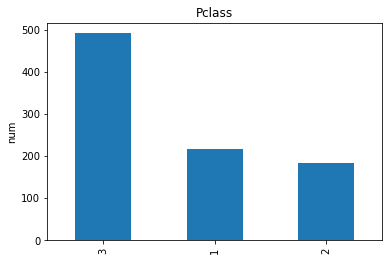

In [80]:
import matplotlib.pyplot as plt

X.Pclass.value_counts().plot(kind="bar")
plt.title("Pclass")
plt.ylabel("num")
plt.show()

AttributeError: 'Series' object has no attribute 'value_count'

In [5]:
a = []
for i in range(8888):
    for j in range(i, 8888):
        a.append(i)

In [9]:
import numpy as np

In [17]:
np.arange(5,10) 

array([5, 6, 7, 8, 9])

In [13]:
100/3

33.333333333333336